In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler

With the accidents involving Boeing's 737 Max, there have been speculations and concerns about airline safety. Then there was a crash of a helicopter involving Kobe Bryant. Academic studies have found that high-profile crashes can shift passenger demand away from the airlines involved in the disasters.

Should Travelers Avoid Flying Airlines That Have Had Crashes in the Past? That’s the question we will try to address in this exercise. The dataset for this has been sourced from Aviation Safety Network and available at this link: https://github.com/fivethirtyeight/data/tree/master/airline-safety. (Links to an external site.)

The dataset has following list of attributes:

| Attribute Name         | Attribute Description                                                |
|------------------------|----------------------------------------------------------------------|
| airline                | Airline (asterisk indicates that regional subsidiaries are included) |
| avail_seat_km_per_week | Available seat kilometers flown every week                           |
| incidents_85_99        | Total number of incidents, 1985–1999                                 |
| fatal_accidents_85_99  | Total number of fatal accidents, 1985–1999                           |
| fatalities_85_99       | Total number of fatalities, 1985–1999                                |
| incidents_00_14        | Total number of incidents, 2000–2014                                 |
| fatal_accidents_00_14  | Total number of fatal accidents, 2000–2014                           |
| fatalities_00_14       | Total number of fatalities, 2000–2014                                |

Use this dataset and two different clustering approaches (agglomerative and divisive) to group the airlines with similar safety records. Do these two approaches lead to same/similar results? Provide appropriate visualizations, clustering summaries, and your interpretations.

In [19]:
df = pd.read_csv("airline-safety.csv")
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [36]:
## model : kmean
#X = df.iloc[:,1:-1]
X = df.iloc[:,[2,4]]
num_group = 4
print("# groups:", num_group)
#scaler = preprocessing.StandardScaler()
#scaler.fit_transform(X)

kmeans = KMeans(n_clusters=num_group)

# Fitting the model
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
print(centroids)
print(y_kmeans)

# groups: 4
[[  8.5        282.1       ]
 [  2.73333333   8.4       ]
 [ 12.75       471.75      ]
 [ 15.33333333 111.25      ]]
[1 3 1 3 1 3 0 1 1 1 1 3 1 0 1 1 2 1 1 2 0 1 3 1 0 1 1 3 2 1 1 2 1 1 1 0 3
 1 1 1 0 1 3 1 1 0 1 3 1 0 3 0 0 3 1 3]


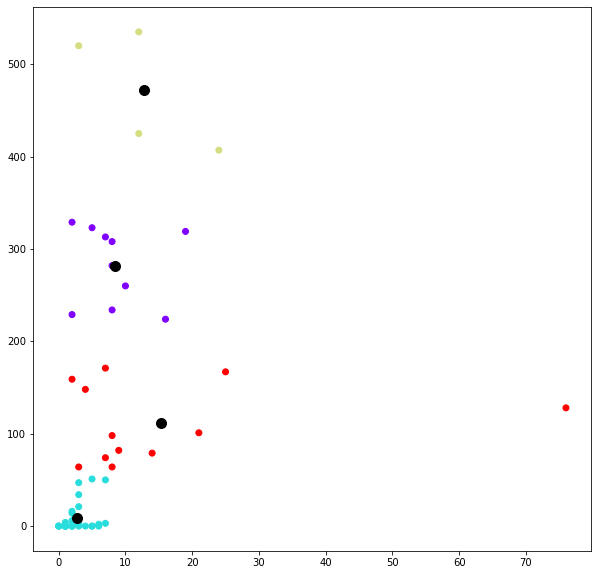

In [37]:
# Visualize the clusters
plt.figure(figsize=(10,10))
plt.scatter(X['incidents_85_99'], X['fatalities_85_99'], c = y_kmeans, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100)
plt.show()# Visualize the clusters

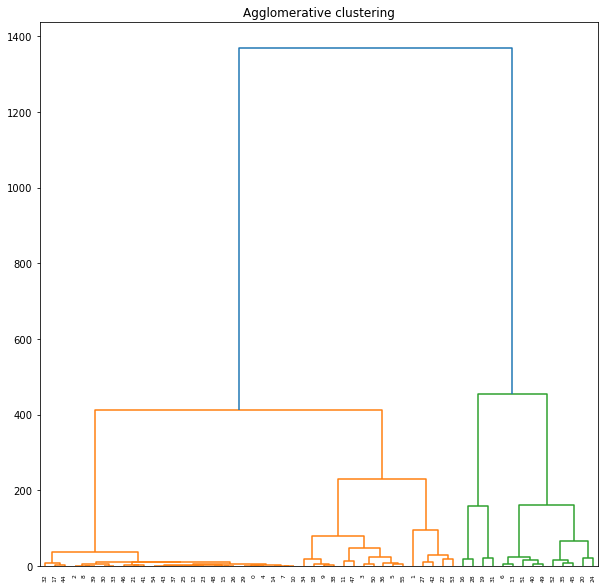

In [38]:
#cVisualizing the data
plt.figure(figsize =(10, 10)) 
plt.title('Agglomerative clustering') 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward'))) 

#Making the object of Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters = 4) 
y_ac = ac.fit_predict(X)

In [39]:
y_ac

array([3, 0, 3, 0, 3, 0, 1, 3, 3, 0, 3, 0, 3, 1, 3, 3, 2, 3, 0, 2, 1, 3,
       0, 3, 1, 3, 3, 0, 2, 3, 3, 2, 3, 3, 0, 1, 0, 3, 0, 3, 1, 3, 0, 3,
       3, 1, 3, 0, 3, 1, 0, 1, 1, 0, 3, 0])